# Machine Learning
The "Machine learning" file performs data analysis on heart disease risk using various machine learning algorithms. The data is loaded from the "heart_disease_risk.csv" file and split into features and the target variable. Subsequently, the data is standardized, and performance metrics are measured for each model. This analysis provides significant insights into predicting heart disease risk using different machine learning algorithms.

### Required libraries

In [1]:
import pandas as pd
import xgboost as xgb

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from main import balance_data_smote, balance_data_smotetomek, display_confusion_matrix, display_results, export_sav_model, generate_results, save_results_to_xlsx, test_sav_model, train_model, train_model_cross_val,  train_model_loo, train_model_bootstrapping, train_model_avg_bootstrapping

/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/skl2onnx/algebra/onnx_ops.py:159: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  tys = obj.typeStr or ''
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/skl2onnx/algebra/automation.py:154: UserWarning: OpSchema.FormalParameter.isHomogeneous is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.is_homogeneous instead.
  if getattr(obj, 'isHomogeneous', False):
/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/jinja2/environment.py:485: UserWarning: OpSchema.FormalParameter.typeStr is deprecated and will be removed in 1.16. Use OpSchema.FormalParameter.type_str instead.
  return getattr(obj, attribute)


### Loading data

In [2]:
data = pd.read_csv('Data/heart_disease_risk.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Data Split: Features and Target

In [3]:
X = data.drop('decision', axis=1)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 13) (90, 13) (207,) (90,)


### Standardization of Data

In [4]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Data Balancing

In [5]:
# X_train, y_train = balance_data_smote(X_train, y_train)
X_train, y_train = balance_data_smotetomek(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(198, 13)
(198,)


### Logistic Regression

Accuracy: 0.86
ROC AUC Score: 0.85
G-Mean: 0.73
F1 Score: 0.85
Sensitivity: 0.82
Specificity: 0.89
Precision: 0.88
AVG: 0.81


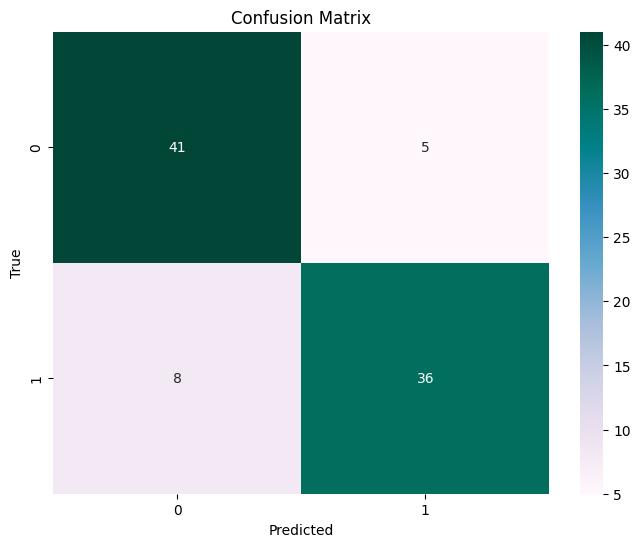

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
model = LogisticRegression(solver='liblinear', penalty='l2', C=0.1)

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('Data/results', [('Logistic Regression', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/logistic_regression.sav")
result = test_sav_model("Sav_models/logistic_regression.sav", "Data/test_data.npy")
print(result)

### Ridge Classifier

Accuracy: 0.83
ROC AUC Score: 0.83
G-Mean: 0.69
F1 Score: 0.82
Sensitivity: 0.77
Specificity: 0.89
Precision: 0.87
AVG: 0.78


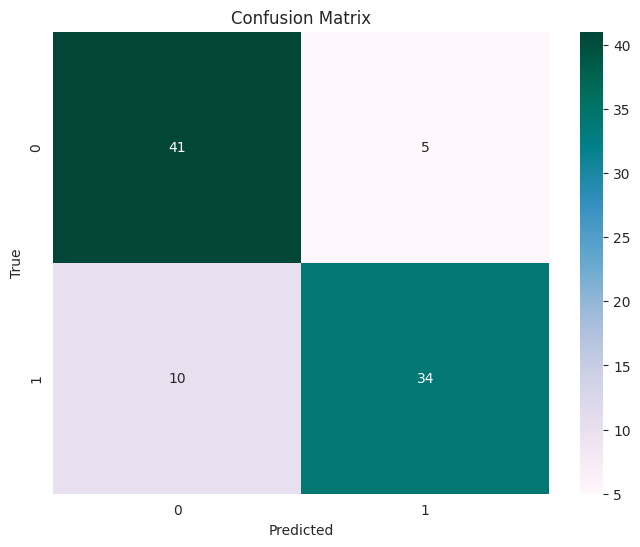

Model exported successfully.
[1 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(


In [59]:
model = RidgeClassifier(solver='auto')

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('Data/results', [('Ridge', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/ridge.sav")
result = test_sav_model("Sav_models/ridge.sav", "Data/test_data.npy")
print(result)

### Naive Bayes

Accuracy: 0.86
ROC AUC Score: 0.85
G-Mean: 0.73
F1 Score: 0.85
Sensitivity: 0.82
Specificity: 0.89
Precision: 0.88
AVG: 0.81


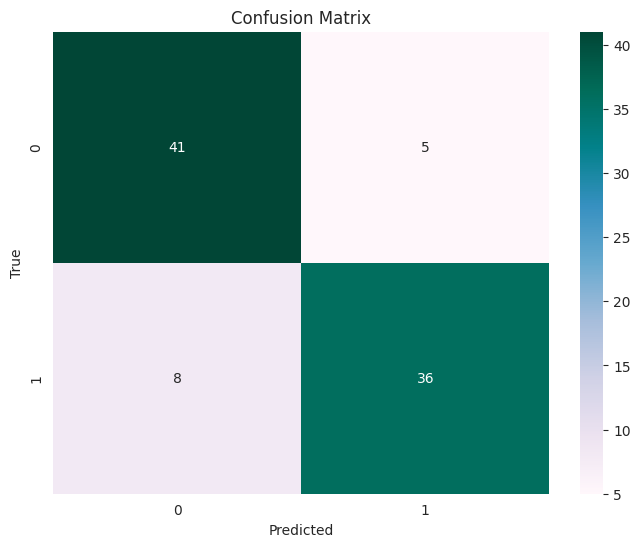

Model exported successfully.
[1 1 1 1 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [8]:
model = GaussianNB()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('Data/results', [('Naive Bayes', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/naive_bayes.sav")
result = test_sav_model("Sav_models/naive_bayes.sav", "Data/test_data.npy")
print(result)

### Support Vector Machine (SVM)

Accuracy: 0.8
ROC AUC Score: 0.8
G-Mean: 0.64
F1 Score: 0.79
Sensitivity: 0.77
Specificity: 0.83
Precision: 0.81
AVG: 0.74


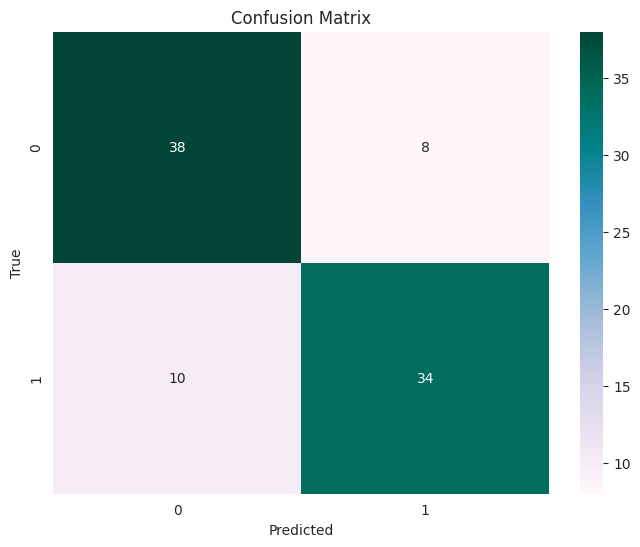

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [63]:
model = SVC(kernel="linear")

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('Data/results', [('SVM', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/svm.sav")
result = test_sav_model("Sav_models/svm.sav", "Data/test_data.npy")
print(result)

### K-Nearest Neighbors (KNN)

Accuracy: 0.74
ROC AUC Score: 0.75
G-Mean: 0.55
F1 Score: 0.75
Sensitivity: 0.77
Specificity: 0.72
Precision: 0.72
AVG: 0.68


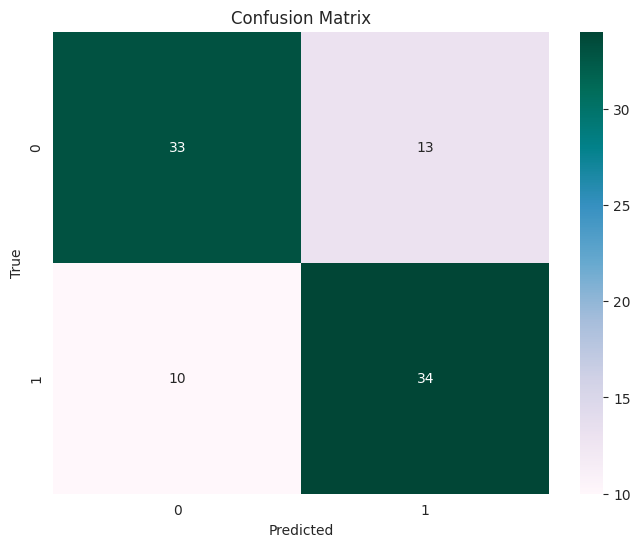

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [66]:
model = KNeighborsClassifier(n_neighbors=12, p=1, weights='distance')  # Parameters found by GridSearchCV

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('Data/results', [('KNN', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/knn.sav")
result = test_sav_model("Sav_models/knn.sav", "Data/test_data.npy")
print(result)

### Nearest Centroid

Accuracy: 0.68
ROC AUC Score: 0.68
G-Mean: 0.46
F1 Score: 0.66
Sensitivity: 0.64
Specificity: 0.72
Precision: 0.68
AVG: 0.6


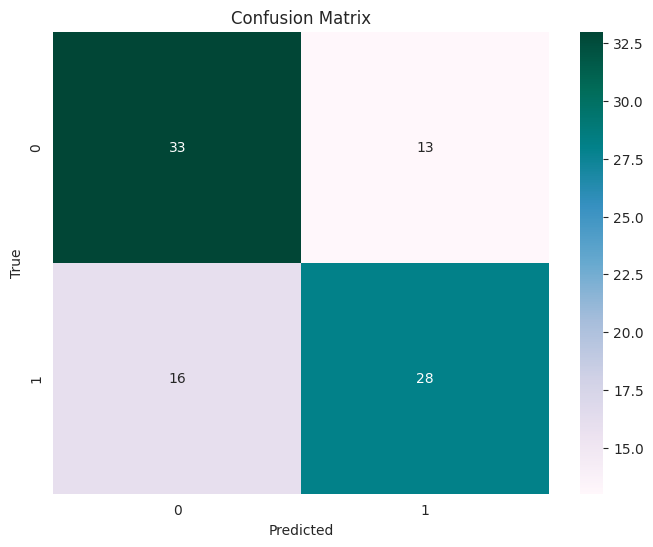

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  warnings.warn(


In [43]:
model = NearestCentroid(metric='manhattan')

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('Data/results', [('Nearest Centroid', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/nearest_centroid.sav")
result = test_sav_model("Sav_models/nearest_centroid.sav", "Data/test_data.npy")
print(result)

### Linear Discriminant Analysis (LDA)

Accuracy: 0.83
ROC AUC Score: 0.83
G-Mean: 0.69
F1 Score: 0.82
Sensitivity: 0.77
Specificity: 0.89
Precision: 0.87
AVG: 0.78


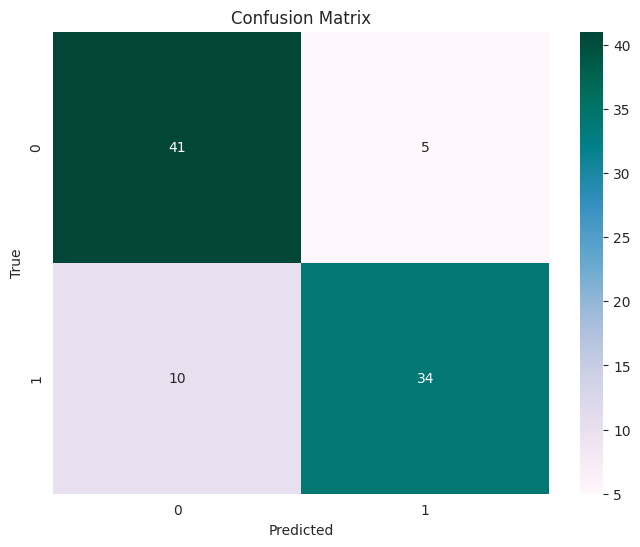

Model exported successfully.
[1 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [65]:
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')  # Parameters found by GridSearchCV

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('Data/results', [('Linear Discriminant', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/linear_discriminant.sav")
result = test_sav_model("Sav_models/linear_discriminant.sav", "Data/test_data.npy")
print(result)

### Quadratic Discriminant Analysis (QDA)

Accuracy: 0.79
ROC AUC Score: 0.79
G-Mean: 0.62
F1 Score: 0.79
Sensitivity: 0.8
Specificity: 0.78
Precision: 0.78
AVG: 0.73


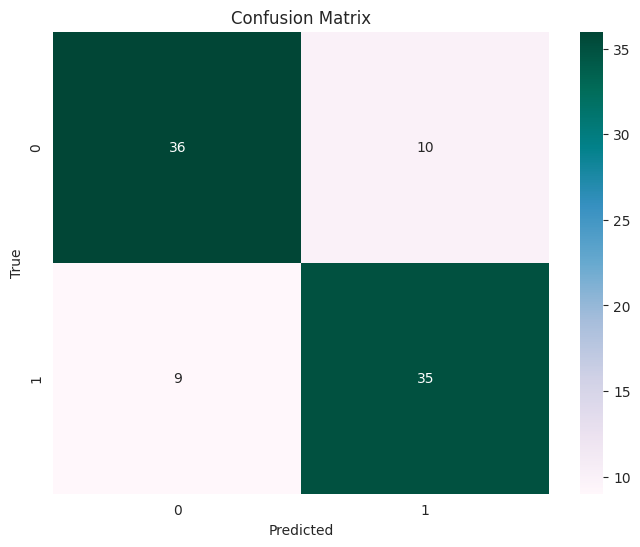

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [68]:
model = QuadraticDiscriminantAnalysis(reg_param=0.1)  # Parameters found by GridSearchCV

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('Data/results', [('Quadratic Discriminant', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/quadratic_discriminant.sav")
result = test_sav_model("Sav_models/quadratic_discriminant.sav", "Data/test_data.npy")
print(result)

### Decision Tree

Accuracy: 0.73
ROC AUC Score: 0.73
G-Mean: 0.54
F1 Score: 0.72
Sensitivity: 0.7
Specificity: 0.76
Precision: 0.74
AVG: 0.66


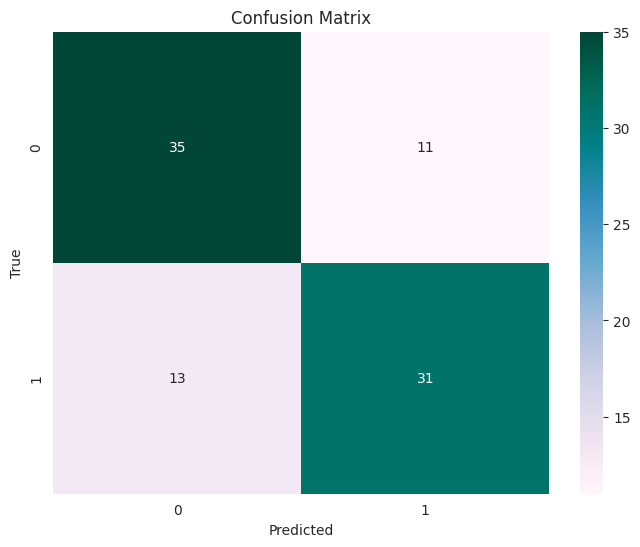

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [80]:
model = DecisionTreeClassifier(max_depth=10)

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=1000, test_size=0.3)
save_results_to_xlsx('Data/results', [('Decision Tree', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/decision_tree.sav")
result = test_sav_model("Sav_models/decision_tree.sav", "Data/test_data.npy")
print(result)

### Extra Trees

Accuracy: 0.83
ROC AUC Score: 0.83
G-Mean: 0.69
F1 Score: 0.82
Sensitivity: 0.8
Specificity: 0.87
Precision: 0.85
AVG: 0.78


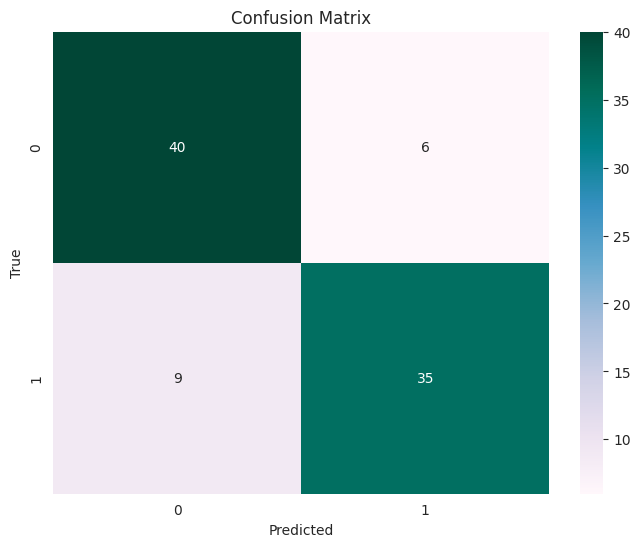

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [15]:
model = ExtraTreesClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=100, test_size=0.3)
save_results_to_xlsx('Data/results', [('Extra Trees', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/extra_trees.sav")
result = test_sav_model("Sav_models/extra_trees.sav", "Data/test_data.npy")
print(result)

### Random Forest

Accuracy: 0.84
ROC AUC Score: 0.84
G-Mean: 0.71
F1 Score: 0.83
Sensitivity: 0.8
Specificity: 0.89
Precision: 0.88
AVG: 0.8


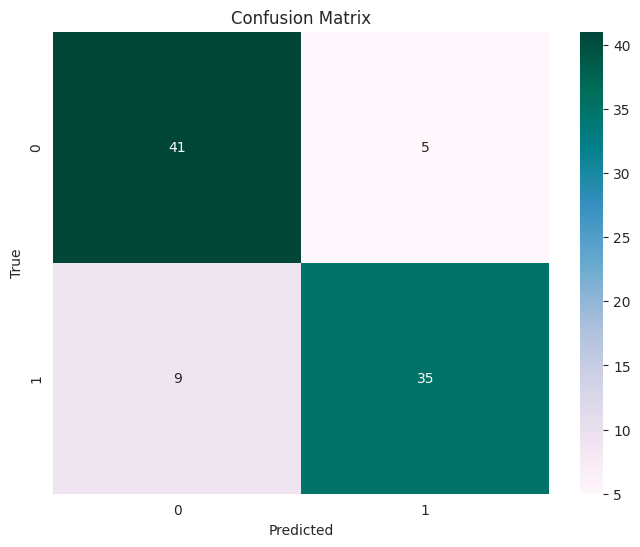

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
model = RandomForestClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=100, test_size=0.3)
save_results_to_xlsx('Data/results', [('Random Forest', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/random_forest.sav")
result = test_sav_model("Sav_models/random_forest.sav", "Data/test_data.npy")
print(result)

### Gradient Boosting

Accuracy: 0.78
ROC AUC Score: 0.78
G-Mean: 0.6
F1 Score: 0.77
Sensitivity: 0.75
Specificity: 0.8
Precision: 0.79
AVG: 0.72


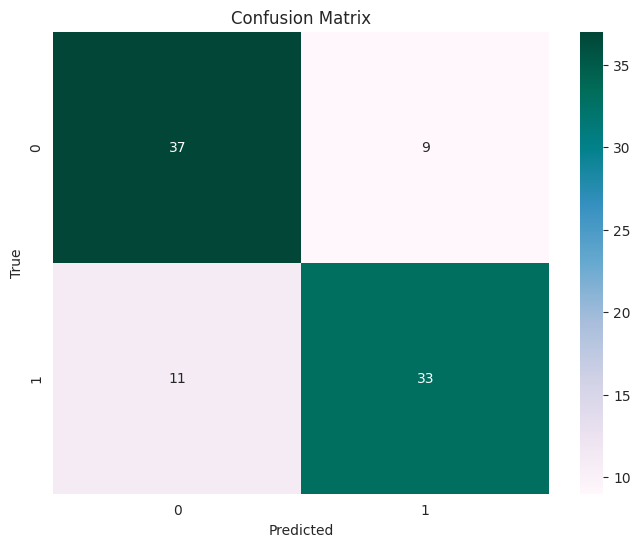

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [17]:
model = GradientBoostingClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=100, test_size=0.3)
save_results_to_xlsx('Data/results', [('Gradient Boosting', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/gradient_boosting.sav")
result = test_sav_model("Sav_models/gradient_boosting.sav", "Data/test_data.npy")
print(result)

### Stochastic Gradient Boosting (SGBoost)

Accuracy: 0.79
ROC AUC Score: 0.79
G-Mean: 0.62
F1 Score: 0.77
Sensitivity: 0.73
Specificity: 0.85
Precision: 0.82
AVG: 0.73


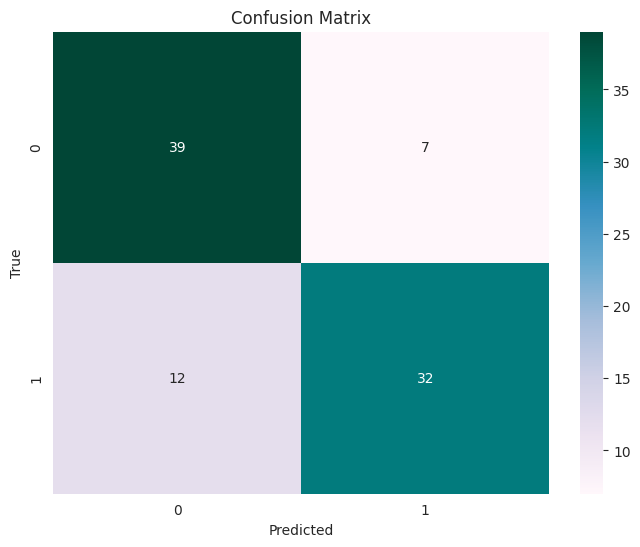

Model exported successfully.
[0 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [18]:
model = HistGradientBoostingClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=100, test_size=0.3)
save_results_to_xlsx('Data/results', [('SGBoost', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/sgboost.sav")
result = test_sav_model("Sav_models/sgboost.sav", "Data/test_data.npy")
print(result)

### Extreme Gradient Boosting (XGBoost)

Accuracy: 0.77
ROC AUC Score: 0.77
G-Mean: 0.59
F1 Score: 0.76
Sensitivity: 0.75
Specificity: 0.78
Precision: 0.77
AVG: 0.7


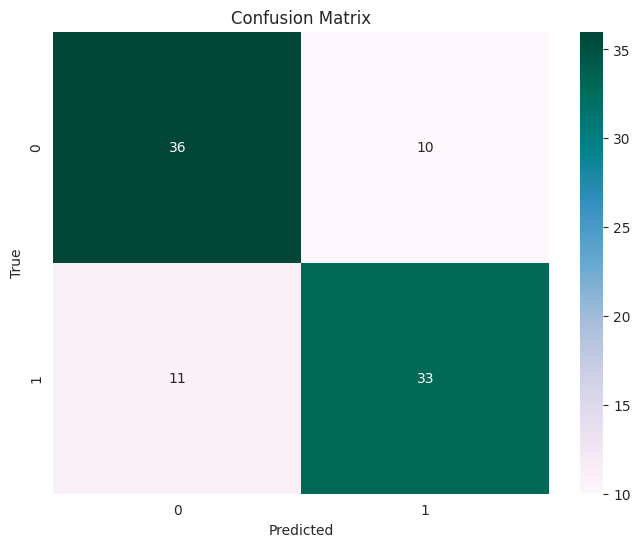

Model exported successfully.
[0 1 1 0 0]


In [19]:
model = xgb.XGBClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=100, test_size=0.3)
save_results_to_xlsx('Data/results', [('XGBoost', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/xgboost.sav")
result = test_sav_model("Sav_models/xgboost.sav", "Data/test_data.npy")
print(result)

### Ada Boost

Accuracy: 0.8
ROC AUC Score: 0.8
G-Mean: 0.64
F1 Score: 0.8
Sensitivity: 0.8
Specificity: 0.8
Precision: 0.8
AVG: 0.75


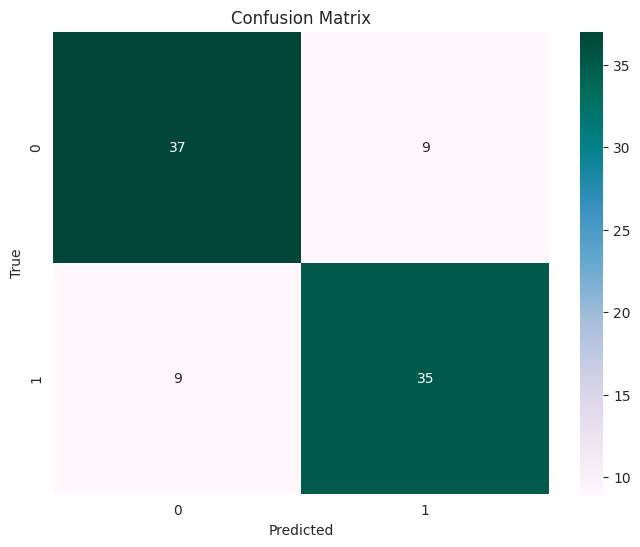

Model exported successfully.
[0 1 1 1 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [20]:
model = AdaBoostClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=100, test_size=0.3)
save_results_to_xlsx('Data/results', [('Ada Boost', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/ada_boost.sav")
result = test_sav_model("Sav_models/ada_boost.sav", "Data/test_data.npy")
print(result)

### Cat Boost

Learning rate set to 0.005204
0:	learn: 0.6886655	total: 52.3ms	remaining: 52.2s
1:	learn: 0.6839600	total: 53.4ms	remaining: 26.7s
2:	learn: 0.6790675	total: 54.3ms	remaining: 18.1s
3:	learn: 0.6747769	total: 55.2ms	remaining: 13.8s
4:	learn: 0.6706677	total: 56.9ms	remaining: 11.3s
5:	learn: 0.6662334	total: 58.3ms	remaining: 9.66s
6:	learn: 0.6626878	total: 59.2ms	remaining: 8.4s
7:	learn: 0.6582444	total: 60.3ms	remaining: 7.48s
8:	learn: 0.6553614	total: 61.1ms	remaining: 6.73s
9:	learn: 0.6520161	total: 62.4ms	remaining: 6.18s
10:	learn: 0.6475953	total: 64.1ms	remaining: 5.76s
11:	learn: 0.6440708	total: 65.3ms	remaining: 5.38s
12:	learn: 0.6398677	total: 66.2ms	remaining: 5.02s
13:	learn: 0.6356438	total: 67.1ms	remaining: 4.73s
14:	learn: 0.6317990	total: 68.4ms	remaining: 4.49s
15:	learn: 0.6280147	total: 69.7ms	remaining: 4.29s
16:	learn: 0.6241766	total: 70.6ms	remaining: 4.08s
17:	learn: 0.6213162	total: 71.3ms	remaining: 3.89s
18:	learn: 0.6178105	total: 72.2ms	remaining:

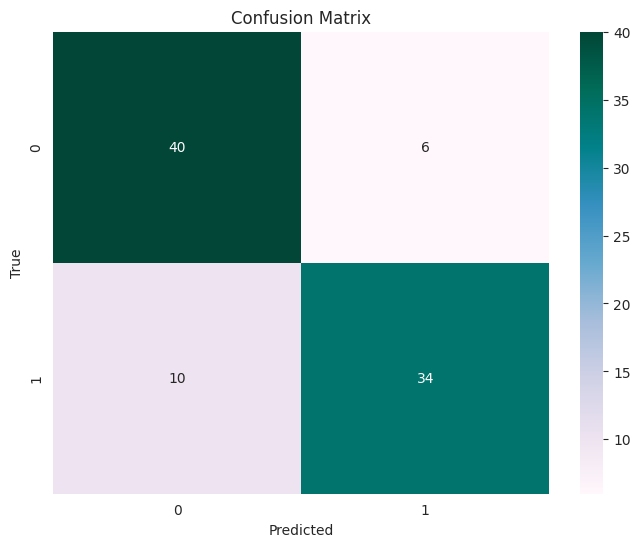

Learning rate set to 0.006135
0:	learn: 0.6881514	total: 1.31ms	remaining: 1.31s
1:	learn: 0.6814361	total: 2.27ms	remaining: 1.13s
2:	learn: 0.6749754	total: 3.3ms	remaining: 1.1s
3:	learn: 0.6690558	total: 4.36ms	remaining: 1.08s
4:	learn: 0.6628186	total: 5.57ms	remaining: 1.11s
5:	learn: 0.6567270	total: 6.64ms	remaining: 1.1s
6:	learn: 0.6526125	total: 7.61ms	remaining: 1.08s
7:	learn: 0.6483759	total: 8.6ms	remaining: 1.06s
8:	learn: 0.6428452	total: 9.51ms	remaining: 1.05s
9:	learn: 0.6377435	total: 10.4ms	remaining: 1.03s
10:	learn: 0.6320744	total: 11.5ms	remaining: 1.03s
11:	learn: 0.6271050	total: 12.5ms	remaining: 1.03s
12:	learn: 0.6221081	total: 13.6ms	remaining: 1.03s
13:	learn: 0.6172708	total: 14.6ms	remaining: 1.03s
14:	learn: 0.6120126	total: 15.5ms	remaining: 1.02s
15:	learn: 0.6064407	total: 16.5ms	remaining: 1.01s
16:	learn: 0.6009090	total: 17.4ms	remaining: 1.01s
17:	learn: 0.5958687	total: 18.6ms	remaining: 1.01s
18:	learn: 0.5910389	total: 20.1ms	remaining: 1.

In [21]:
model = CatBoostClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('Data/results', [('Cat Boost', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/cat_boost.sav")
result = test_sav_model("Sav_models/cat_boost.sav", "Data/test_data.npy")
print(result)

### Light Gradient Boosting Machine (LGBM)

[LightGBM] [Info] Number of positive: 101, number of negative: 101
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 202, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

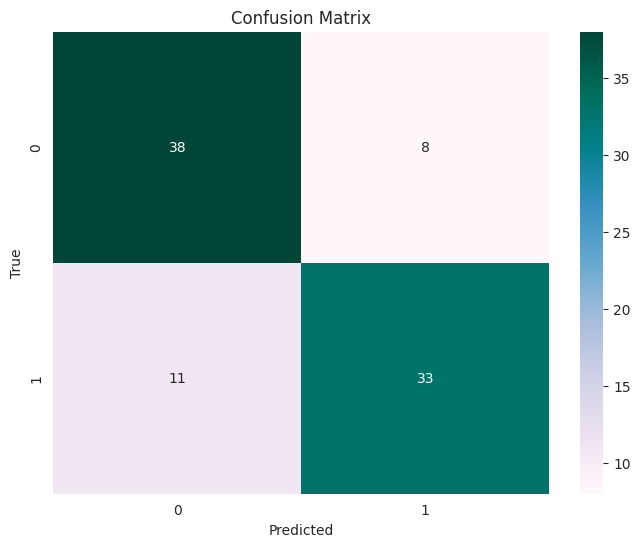

[LightGBM] [Info] Number of positive: 122, number of negative: 175
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 297, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410774 -> initscore=-0.360765
[LightGBM] [Info] Start training from score -0.360765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [22]:
model = LGBMClassifier()

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('Data/results', [('LGBM', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/lgbm.sav")
result = test_sav_model("Sav_models/lgbm.sav", "Data/test_data.npy")
print(result)

### Multi-layer Perceptron (MLP/Neural Network)

Accuracy: 0.67
ROC AUC Score: 0.66
G-Mean: 0.35
F1 Score: 0.52
Sensitivity: 0.36
Specificity: 0.96
Precision: 0.89
AVG: 0.51


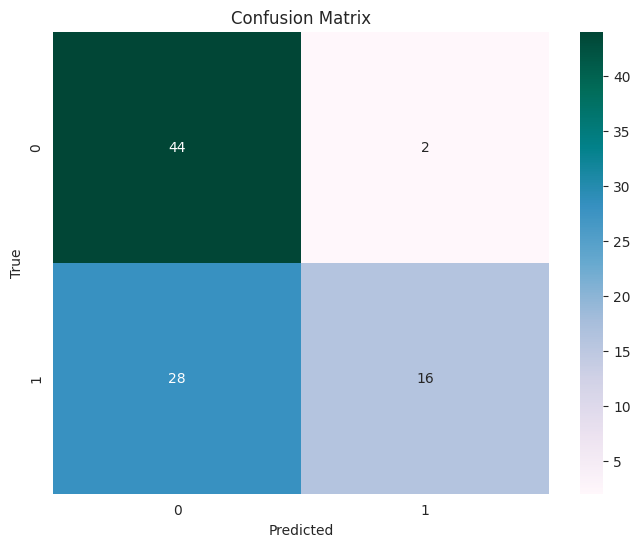

Model exported successfully.
[1 1 1 0 0]


/home/michal/PycharmProjects/Heart disease risk prediction/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [32]:
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500)  # Parameters found by GridSearchCV

# Train single model
y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

# Bootstrapping
avg_results = train_model_avg_bootstrapping(model, X, y, num_samples=10, test_size=0.3)
save_results_to_xlsx('Data/results', [('Neural Network', *avg_results)])

# Export sav model
export_sav_model(model, X_train, y_train, "Sav_models/neural_network.sav")
result = test_sav_model("Sav_models/neural_network.sav", "Data/test_data.npy")
print(result)